预测复发概率好了

#### 加载必要的库 Load necessary libraries

In [153]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 加载数据

In [154]:
# 加载数据集
data_path = '../Dataset/gse39582_n469_clinical_data.xlsx'

data_raw = pd.read_excel(data_path)

In [155]:
data_raw.head()

,Sample_ID,title,status,submission_date,last_update_date,organism,dataset,sex,age_at_diagnosis_in_years,tnm_stage,...,kras_mutation_exon_number,kras_mutation_protein,braf_mutation,braf_mutation_dna,braf_mutation_exon_number,braf_mutation_protein,cit_molecular_subtype,CMS,PDS_call,name
0,GSM971959,CIT003,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,36.9,2,...,NaN,NaN,WT,NaN,NaN,NaN,C3,CMS3,PDS1,NaN
1,GSM971962,CIT006,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,60.9,3,...,NaN,NaN,WT,NaN,NaN,NaN,C4,CMS4,PDS2,NaN
2,GSM971963,CIT007,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Male,78.2,2,...,NaN,NaN,WT,NaN,NaN,NaN,C2,CMS1,PDS2,NaN
3,GSM971964,CIT008,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Female,35.4,3,...,NaN,NaN,WT,NaN,NaN,NaN,C1,CMS2,PDS1,NaN
4,GSM971965,CIT009,Public on May 22 2013,Jul 23 2012,Jun 18 2021,Homo sapiens,discovery,Female,37.5,2,...,c.35G>A,p.G12D,WT,NaN,NaN,NaN,C1,UNK,PDS3,NaN


In [156]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sample_ID                   469 non-null    object 
 1   title                       469 non-null    object 
 2   status                      469 non-null    object 
 3   submission_date             469 non-null    object 
 4   last_update_date            469 non-null    object 
 5   organism                    469 non-null    object 
 6   dataset                     469 non-null    object 
 7   sex                         473 non-null    object 
 8   age_at_diagnosis_in_years   473 non-null    float64
 9   tnm_stage                   473 non-null    int64  
 10  tnm.t                       449 non-null    object 
 11  tnm.n                       449 non-null    object 
 12  tnm.m                       449 non-null    object 
 13  tumour_location             469 non

In [157]:
data = data_raw[['sex', 
                 'age_at_diagnosis_in_years', 
                 'tnm_stage', 
                 'chemotherapy_adjuvant', 
                 'chemotherapy_adjuvant_type',
                 'rfs_event',
                 'rfs_months',
                 'os_event',
                 'os_months',
                 'CMS',
                 'PDS_call']]

In [158]:
# 查看哪些字段有空
data.isnull().sum()

sex                             0
age_at_diagnosis_in_years       0
tnm_stage                       0
chemotherapy_adjuvant           2
chemotherapy_adjuvant_type    325
rfs_event                       8
rfs_months                      5
os_event                        7
os_months                       3
CMS                             0
PDS_call                        0
dtype: int64

In [159]:
# 对源数据集进行描述
data.describe(include='all')

,sex,age_at_diagnosis_in_years,tnm_stage,chemotherapy_adjuvant,chemotherapy_adjuvant_type,rfs_event,rfs_months,os_event,os_months,CMS,PDS_call
count,473,473.000000,473.000000,471,148,465.000000,468.000000,466.000000,470.000000,473,473
unique,2,NaN,NaN,3,5,NaN,NaN,NaN,NaN,5,4
top,Male,NaN,NaN,N,5FU,NaN,NaN,NaN,NaN,CMS2,PDS1
freq,265,NaN,NaN,264,80,NaN,NaN,NaN,NaN,161,154
mean,NaN,67.307400,2.433404,NaN,NaN,0.307527,52.615385,0.311159,60.370213,NaN,NaN
std,NaN,13.522875,0.496070,NaN,NaN,0.461967,40.271583,0.463465,38.775984,NaN,NaN
min,NaN,20.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,59.000000,2.000000,NaN,NaN,0.000000,19.000000,0.000000,32.000000,NaN,NaN
50%,NaN,69.000000,2.000000,NaN,NaN,0.000000,47.500000,0.000000,54.500000,NaN,NaN
75%,NaN,77.000000,3.000000,NaN,NaN,1.000000,77.000000,1.000000,82.000000,NaN,NaN


In [160]:
# 对数据集进行清理
data.dropna(subset=['chemotherapy_adjuvant', 'rfs_event', 'rfs_months', 'os_event', 'os_months'], inplace=True)

/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_61410/1727950543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['chemotherapy_adjuvant', 'rfs_event', 'rfs_months', 'os_event', 'os_months'], inplace=True)


In [161]:
# 查看哪些字段有空
data.isnull().sum()

sex                             0
age_at_diagnosis_in_years       0
tnm_stage                       0
chemotherapy_adjuvant           0
chemotherapy_adjuvant_type    317
rfs_event                       0
rfs_months                      0
os_event                        0
os_months                       0
CMS                             0
PDS_call                        0
dtype: int64

In [162]:
data['sex_numeric'] = data['sex'].map({'Male': 0, 'Female': 1})

# 将chemotherapy_adjuvant中的'N'变成0，'Y'变成1
data['chemotherapy_adjuvant_numeric'] = data['chemotherapy_adjuvant'].map({'N': 0, 'Y': 1})

# 为chemotherapy_adjuvant_type定义新的label
# 假设有6种类型，这里需要根据实际情况来定义映射，下面的映射只是一个示例
chemo_type_mapping = {'N/A': 0, '5FU': 1, 'FOLFIRI': 2, 'FOLFOX': 3, 'FUFOL': 4, 'other': 5}
data['chemotherapy_adjuvant_type_numeric'] = data['chemotherapy_adjuvant_type'].map(chemo_type_mapping)
# 填充NaN值为0，假设NaN代表没有接受化疗
data['chemotherapy_adjuvant_type_numeric'] = data['chemotherapy_adjuvant_type_numeric'].fillna(0)

# 为CMS定义标签
cms_mapping = {'CMS1': 1, 'CMS2': 2, 'CMS3': 3, 'CMS4': 4, 'UNK': 0}  # 假设UNK代表未知，赋值为0
data['CMS_numeric'] = data['CMS'].map(cms_mapping)

# 为PDS_call定义标签
pds_call_mapping = {'PDS1': 1, 'PDS2': 2, 'PDS3': 3, 'Mixed': 4}
data['PDS_call_numeric'] = data['PDS_call'].map(pds_call_mapping)

# 创建新目标值 relapse
# 为0时不复发不死亡；为1时复发不死亡；为2的时候不复发但是死亡；为3的时候复发并且死亡
data['relapse'] = data.apply(lambda x: 0 if x['rfs_event'] == 0 and x['os_event'] == 0 else
                                          1 if x['rfs_event'] == 1 and x['os_event'] == 0 else
                                          2 if x['rfs_event'] == 0 and x['os_event'] == 1 else
                                          3, axis=1)

# 删除原来的列
data.drop(['sex', 'chemotherapy_adjuvant', 'chemotherapy_adjuvant_type', 'CMS', 'PDS_call'], axis=1, inplace=True)

# 查看处理后的前几行数据以确保一切按预期进行
print(data.head())

   age_at_diagnosis_in_years  tnm_stage  rfs_event  rfs_months  os_event  \
0                       36.9          2        1.0         4.0       0.0   
1                       60.9          3        0.0        73.0       0.0   
2                       78.2          2        1.0        17.0       1.0   
3                       35.4          3        0.0        35.0       0.0   
4                       37.5          2        0.0        33.0       0.0   

   os_months  sex_numeric  chemotherapy_adjuvant_numeric  \
0       52.0            0                              0   
1       73.0            0                              1   
2       20.0            0                              1   
3       35.0            1                              0   
4       33.0            1                              0   

   chemotherapy_adjuvant_type_numeric  CMS_numeric  PDS_call_numeric  relapse  
0                                 0.0            3                 1        1  
1                     

/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_61410/725438862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex_numeric'] = data['sex'].map({'Male': 0, 'Female': 1})
/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_61410/725438862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chemotherapy_adjuvant_numeric'] = data['chemotherapy_adjuvant'].map({'N': 0, 'Y': 1})
/var/folders/1_/vzcn0wp93dv8qshp0tmkb16c0000gn/T/ipykernel_61410/725438862.py:9: SettingWithCopyWarnin

In [163]:
data.isnull().sum()

age_at_diagnosis_in_years             0
tnm_stage                             0
rfs_event                             0
rfs_months                            0
os_event                              0
os_months                             0
sex_numeric                           0
chemotherapy_adjuvant_numeric         0
chemotherapy_adjuvant_type_numeric    0
CMS_numeric                           0
PDS_call_numeric                      0
relapse                               0
dtype: int64

In [164]:
data['relapse'].value_counts()

relapse
0    272
3     91
2     49
1     48
Name: count, dtype: int64

<Axes: xlabel='relapse', ylabel='count'>

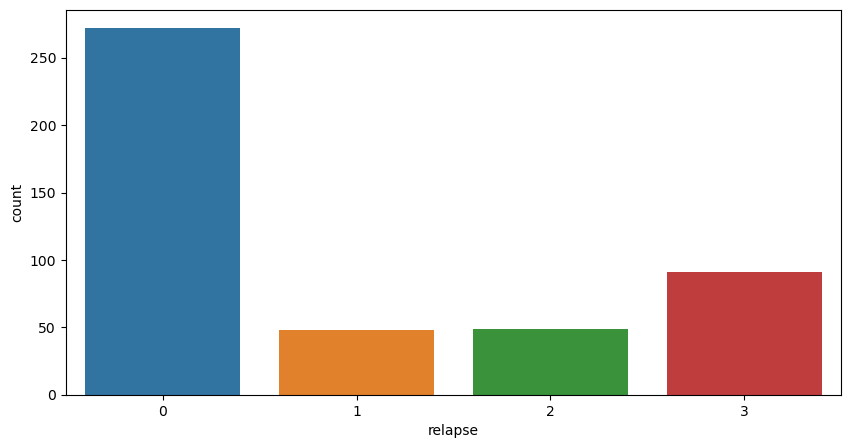

In [165]:
# 设置图的大小
plt.figure(figsize=(10, 5))

# 绘制countplot
sns.countplot(x='relapse', data=data)

### 构建特征

#### 疾病发展 Disease Progression

In [166]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

In [167]:
y = data['relapse']
features = ['age_at_diagnosis_in_years', 'sex_numeric', 'tnm_stage', 'chemotherapy_adjuvant_numeric', 'chemotherapy_adjuvant_type_numeric', 'CMS_numeric']
X = data[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 不同算法应用

#### 1. 随机森林算法 Random Forest

##### 1.1 载入必要的库

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from itertools import cycle

##### 1.2 使用随机森林算法训练模型

In [170]:
# 创建随机森林模型
dis_RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
dis_RFmodel.fit(X_train, y_train)

# 预测测试数据
y_pred = dis_RFmodel.predict(X_test)
y_pred_prob = dis_RFmodel.predict_proba(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.54
ROC-AUC: 0.66


##### 1.3 利用网格搜索优化模型

In [171]:
# 定义要搜索的参数空间
RFparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [172]:
# 创建网格搜索实例
dis_RFgrid = GridSearchCV(dis_RFmodel, RFparam_grid, cv=5, scoring='roc_auc_ovr', n_jobs=1, verbose=2)

# 执行网格搜索
dis_RFgrid.fit(X_train, y_train)

# 输出最佳参数和最佳准确率
print(f'Best parameters: {dis_RFgrid.best_params_}')
print(f'Optimized Accuracy: {dis_RFgrid.best_score_}')

dis_RFbest_model = dis_RFgrid.best_estimator_

# 使用最佳参数训练的模型进行预测
y_pred = dis_RFbest_model.predict(X_test)
y_pred_prob = dis_RFbest_model.predict_proba(X_test)

# 计算准确率和ROC-AUC
final_accuracy = accuracy_score(y_test, y_pred)
final_roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# 输出最佳参数和最佳准确率
print(f'Final Model Accuracy: {final_accuracy:.2f}')
print(f'Final Model ROC-AUC: {final_roc_auc:.2f}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    )
      
  File "/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    return _check_feature_names_in(self, input_features)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    if 

##### 1.4 混淆矩阵和ROC曲线

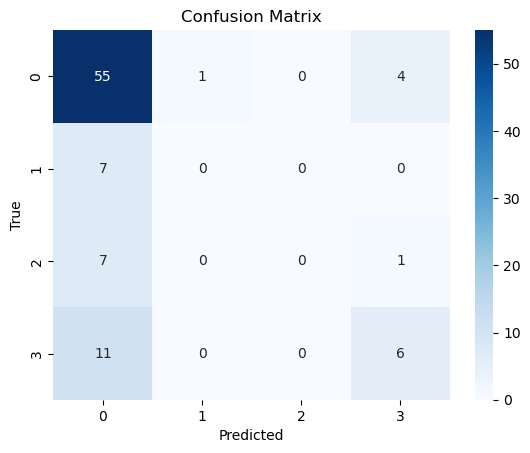

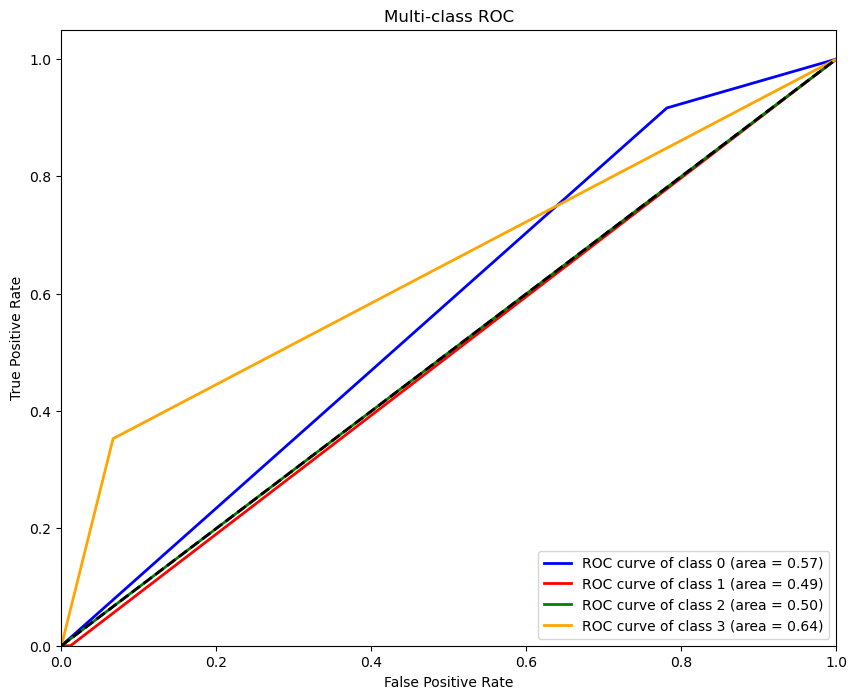

In [173]:
# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 由于是多分类问题，我们需要将标签二值化
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3])

# 设置绘图
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange'])

# 计算每个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, color in zip(range(len(np.unique(y))), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


#### 2. SVM算法

##### 2.1 载入必要的库

In [174]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from itertools import cycle

##### 2.2 使用SVM算法训练模型

In [175]:
# 创建SVM模型
dis_SVMmodel = SVC(probability=True, random_state=42)

# 训练模型
dis_SVMmodel.fit(X_train_scaled, y_train)

# 预测测试数据
y_pred = dis_SVMmodel.predict(X_test_scaled)
y_pred_prob = dis_SVMmodel.predict_proba(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.67
ROC-AUC: 0.50


/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  


##### 2.3 利用网格搜索优化模型

In [176]:
# 定义参数网格
SVMparam_grid = {
    'C': [0.1, 1, 10],  # 正则化强度的逆
    'kernel': ['rbf', 'linear', 'poly'],  # 核函数类型
    'gamma': ['scale', 'auto'],  # 核函数的系数
}

In [177]:
# 创建网格搜索实例
dis_SVMgrid = GridSearchCV(dis_SVMmodel, SVMparam_grid, scoring='roc_auc_ovr', cv=5, verbose=2, n_jobs=1)

# 执行网格搜索
dis_SVMgrid.fit(X_train_scaled, y_train)

print(f'Best parameters: {dis_SVMgrid.best_params_}')
print(f'Best ROC-AUC score: {dis_SVMgrid.best_score_}')

dis_SVMbest_model = dis_SVMgrid.best_estimator_

# 使用最佳参数训练的模型进行预测
y_pred = dis_SVMbest_model.predict(X_test_scaled)
y_pred_prob = dis_SVMbest_model.predict_proba(X_test)

# 计算准确率和ROC-AUC
final_accuracy = accuracy_score(y_test, y_pred)
final_roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# 输出最佳参数和最佳准确率
print(f'Final Model Accuracy: {final_accuracy:.2f}')
print(f'Final Model ROC-AUC: {final_roc_auc:.2f}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale,

/Users/nancyxie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  


##### 2.4 混淆矩阵和ROC曲线

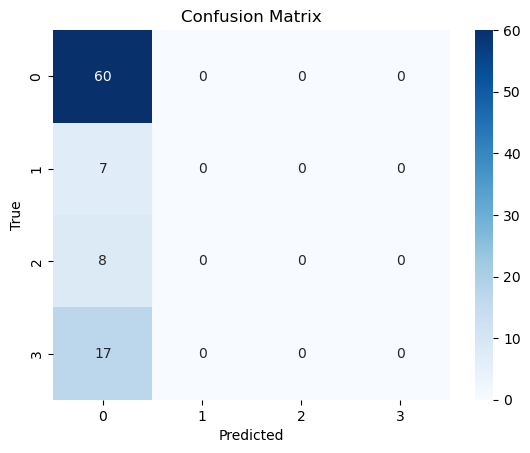

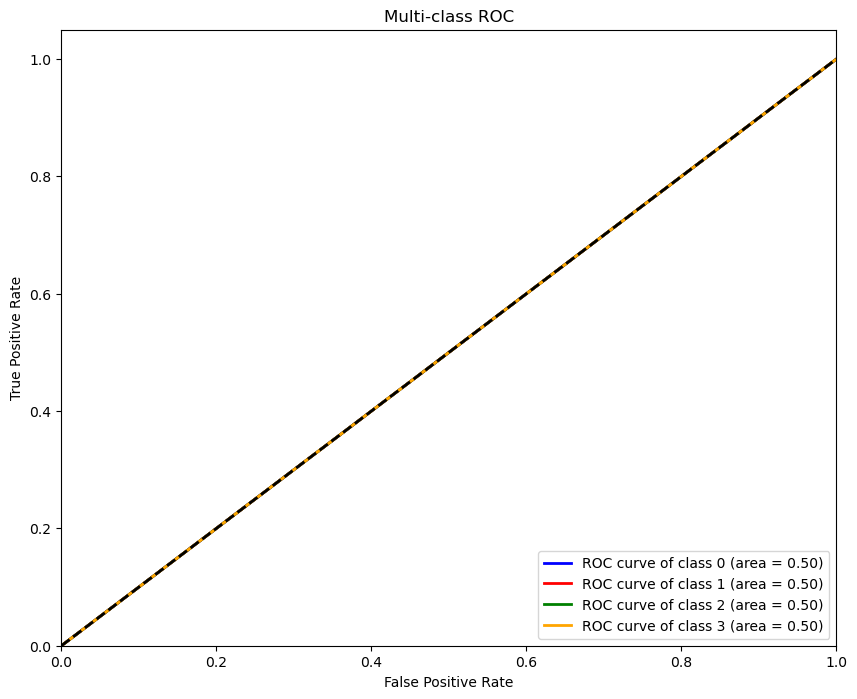

In [178]:
# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC曲线对于多分类问题需要进行一些调整
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3])

# 设置绘图
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange'])

# 计算每个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, color in zip(range(len(np.unique(y))), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

### 选择一个模型保存

In [101]:
import joblib

In [152]:
model_path = '../web/app/models/disease_model.joblib'

# 保存模型
joblib.dump(dis_RFbest_model, model_path)

['../web/app/models/disease_model.joblib']